In [2]:
import pandas as pd
from sklearn import svm, grid_search
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Regression Trees and Support Vector Regression

compare two methods to ﬁt a non-linear regression model

In [13]:
data = pd.read_csv("nist_data.txt",sep=" ",header=None)
train_idx = pd.read_csv("nist_train.txt",sep=" ",header=None)
test_idx = pd.read_csv("nist_test.txt",sep=" ",header=None)
data.columns=['Target','Covariate']
train=data.iloc[train_idx[0]]
test=data.iloc[test_idx[0]]
np.random.seed(77)

In [14]:
max_depth_list=[4,6,8,10,12,14]
gamma_list=[0.0001, 0.001, 0.01, 0.1]
reg_mse_list=[]
svr_mse_list=[]

Fit a regression tree. Maintain all parameters to the default except the maximum depth of the tree. Train a regression tree with the maximum depth set as 4, 6, 8, 10, 12 and 14. Report the Mean Squared Error (MSE) on the test set and the corresponding setting of the maximum tree depth. Plot the test MSE w.r.t. the max depth parameter setting and comment on the best setting obtained.

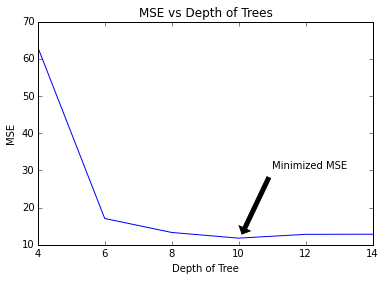

In [15]:
#Compute MSE
for depth in max_depth_list:
    reg= DecisionTreeRegressor(max_depth=depth)
    reg.fit(train['Covariate'][:,None],train['Target'][:,None])
    reg_y_hat=reg.predict(test['Covariate'][:,None])
    reg_mse_list.append(mean_squared_error(test['Target'], reg_y_hat))

#Plot MSE vs Depth of Trees
plt.plot(max_depth_list, reg_mse_list)
plt.title("MSE vs Depth of Trees")
plt.xlabel('Depth of Tree')
plt.ylabel('MSE')
plt.annotate('Minimized MSE', xy=(10, 11), xytext=(11, 30.5), arrowprops=dict(facecolor='black', shrink=0.10))

In [17]:
#Max Depth , MSE
zip(max_depth_list,reg_mse_list)

[(4, 63.136846825054405),
 (6, 17.078634480309528),
 (8, 13.31622120403569),
 (10, 11.787809656086964),
 (12, 12.812527325928656),
 (14, 12.845927402905936)]

The best setting obtained for the regression tree is at a maximum depth of 10. MSE decreases sharply as depth increases from 4 to 6, then slowly decreases as depth increases from 6 to 10, then increases slightly as depth increases from 10 to 12 and levels out as depth increases from 12 to 14.

Now train a kernelized support vector regression (SVR) model using a Radial Basis Function or ‘rbf’ kernel. Maintain the ‘C’ parameter to 1000 and sweep over the γ parameter settings [0.0001, 0.001, 0.01, 0.1]. Comment on the eﬀect of change in the γ setting and the test MSE obtained.

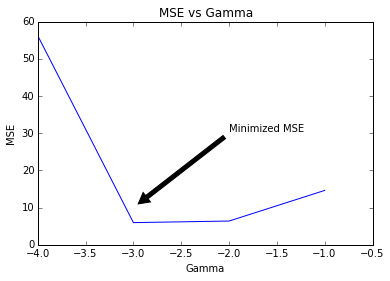

In [18]:
train_X=train['Covariate'][:,None]
train_y=train['Target'][:,]
test_X=test['Covariate'][:,None]
test_y=test['Target'][:,]

#Compute MSE
for g in gamma_list:
    svr = SVR(kernel='rbf',C=1000, gamma=g)
    svr.fit(train_X,train_y)
    svr_y_hat=svr.predict(test_X)
    svr_mse_list.append(mean_squared_error(test['Target'], svr_y_hat))

#Plot MSE vs Gamma
plt.plot(log(gamma_list)/log(10), svr_mse_list)
plt.title("MSE vs Gamma")
plt.xlabel('Gamma')
plt.ylabel('MSE')
plt.annotate('Minimized MSE', xy=(-3, 10), xytext=(-2, 30.5), arrowprops=dict(facecolor='black', shrink=0.05))

In [19]:
#Gamma , MSE 
zip(gamma_list,svr_mse_list)

[(0.0001, 56.21119239178541),
 (0.001, 5.9642068807712425),
 (0.01, 6.3848586128515565),
 (0.1, 14.622321531404117)]

The best parameter gamma for the SVR is 0.001. The MSE decreases sharply as gamma increases from 0.0001 to 0.001, increases slightly as gamma increases from 0.001 to 0.01 and increases at a greater rate as gamma increases from 0.01 to 0.1.

Plots....

In [20]:
#Best Model - Regression Tree
best_reg= DecisionTreeRegressor(max_depth=10)
best_reg.fit(train['Covariate'][:,None],train['Target'][:,None])
best_tree_y_hat=best_reg.predict(test['Covariate'][:,None])

#Best Model - SVR
best_svr = SVR(kernel='rbf',C=1000, gamma=.001)
best_svr.fit(train_X,train_y)
best_svr_y_hat=svr.predict(test_X)

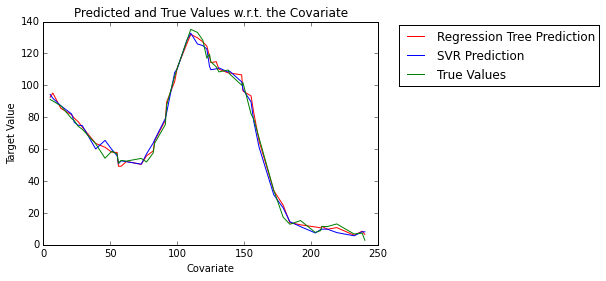

In [21]:
#Plot 1 - Predicted target values w.r.t. the covariate
plt.plot(test_X, best_tree_y_hat,'r',label='Regression Tree Prediction')
plt.plot(test_X, best_svr_y_hat,'b',label='SVR Prediction')
plt.plot(test_X, test_y,'g',label='True Values')
plt.title("Predicted and True Values w.r.t. the Covariate")
plt.xlabel('Covariate')
plt.ylabel('Target Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

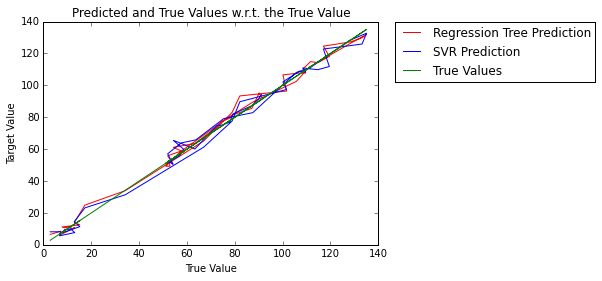

In [22]:
#Plot 2 - Predicted target values w.r.t. the true values
plt.plot(test_y, best_tree_y_hat,'r',label='Regression Tree Prediction')
plt.plot(test_y, best_svr_y_hat,'b',label='SVR Prediction')
plt.plot(test_y, test_y,'g',label='True Values')
plt.title("Predicted and True Values w.r.t. the True Value")
plt.xlabel('True Value')
plt.ylabel('Target Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Based on the above two plots, both classifiers fit the data well and are not overfitting because of using the best parameters. Both classifiers predict the true values similarly well, but it appears that the SVR model is a slightly better fit than the Regression Tree model.